Перші 5 рядків оригінального датасету:
   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Приклад нормалізованих даних (перші 5):
[[0.5        0.33333333 0.62711864 0.45833333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.94444444 0.25       1.         0.91666667]
 [0.47222222 0.375      0.59322034 0.58333333]
 [0.69444444 0.33333333 0.6440678  0.54166667]]

Розмір навчальної вибірки: 120
Розмір тестової вибірки: 30

Найкраще значення k = 1 з точністю (accuracy) = 1.0000


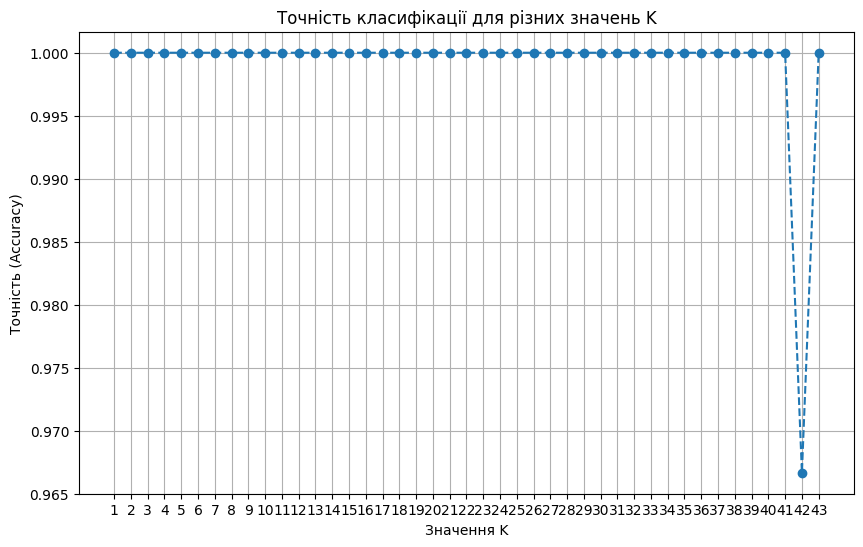

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('IrisData_full.csv', header=None, names=column_names)

print("Перші 5 рядків оригінального датасету:")
print(df.head())

# 2. Перемішати записи у завантаженій базі
# frac=1 означає взяти 100% даних, але у випадковому порядку. random_state для відтворюваності.
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Розділяємо на ознаки (X) та класи (y)
X = df_shuffled.iloc[:, :-1].values # Всі колонки крім останньої
y = df_shuffled.iloc[:, -1].values  # Остання колонка (клас)

# 3. Нормалізувати параметри квітів ірису
# Використовуємо Min-Max нормалізацію (приводимо значення до діапазону 0-1)
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

print("\nПриклад нормалізованих даних (перші 5):")
print(X_normalized[:5])

# 4. Розділити існуючі записи на навчальну і тестові вибірки
# test_size=0.2 означає, що 20% даних піде на тестування, 80% на навчання
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)

print(f"\nРозмір навчальної вибірки: {X_train.shape[0]}")
print(f"Розмір тестової вибірки: {X_test.shape[0]}")

# 5. Навчити KNN-класифікатор з різними значеннями К
# 6. Вибрати величину К для найкращих показників якості
k_range = range(1, 44)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Знаходимо найкраще K
best_score = max(scores)
best_k = k_range[scores.index(best_score)]

print(f"\nНайкраще значення k = {best_k} з точністю (accuracy) = {best_score:.4f}")

# Візуалізація результатів (для звіту)
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o', linestyle='dashed')
plt.title('Точність класифікації для різних значень K')
plt.xlabel('Значення K')
plt.ylabel('Точність (Accuracy)')
plt.xticks(k_range)
plt.grid(True)
plt.show()